In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip -q /content/drive/MyDrive/FakeAVCeleb_v1.2-001.zip -d /content/dataset

In [3]:
!pip install -q git+https://github.com/tensorflow/docs

  Preparing metadata (setup.py) ... done


In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
dataset_path = '/content/dataset/FakeAVCeleb_v1.2'
import os

classes = ['FakeVideo-FakeAudio', 'FakeVideo-RealAudio', 'RealVideo-FakeAudio', 'RealVideo-RealAudio']
data = {}

# Iterate over each class folder
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    data[class_name] = []

    # Iterate over each subfolder
    for ethnicity in os.listdir(class_path):
        ethnicity_path = os.path.join(class_path, ethnicity)

        # Iterate over men and women folders
        for gender in os.listdir(ethnicity_path):
            gender_path = os.path.join(ethnicity_path, gender)

            # Iterate over video files
            for video_file in os.listdir(gender_path):
                video_path = os.path.join(gender_path, video_file)
                for actual in os.listdir(video_path):
                     if ".mp4" in actual:
                      data[class_name].append("/content/dataset/FakeAVCeleb_v1.2/"+class_name+"/"+ethnicity+"/"+gender+"/"+video_file+"/"+actual)

# Check the number of videos per class
for class_name, videos in data.items():
    print(f"Class: {class_name}, Number of videos: {len(videos)}")
    from sklearn.model_selection import train_test_split

# Combine all video paths and corresponding labels
all_videos = []
all_labels = []

for class_name, videos in data.items():
    all_videos.extend(videos)
    all_labels.extend([class_name] * len(videos))

# Split data into training and testing sets
train_videos, test_videos, train_labels, test_labels = train_test_split(all_videos, all_labels, test_size=0.2, random_state=42)

# Check the size of training and testing sets
print("Number of training videos:", len(train_videos))
print("Number of testing videos:", len(test_videos))
print(train_videos[1:6])
print(test_labels[1:6])

Class: FakeVideo-FakeAudio, Number of videos: 10835
Class: FakeVideo-RealAudio, Number of videos: 9709
Class: RealVideo-FakeAudio, Number of videos: 500
Class: RealVideo-RealAudio, Number of videos: 500
Number of training videos: 17235
Number of testing videos: 4309
['/content/dataset/FakeAVCeleb_v1.2/FakeVideo-FakeAudio/African/men/id00944/00135_id04727_wavtolip.mp4', '/content/dataset/FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian_European/women/id00813/00169_id00897_0ayFw8JhoyI_faceswap.mp4', '/content/dataset/FakeAVCeleb_v1.2/FakeVideo-FakeAudio/Asian_South/women/id04927/00013_id00747_l3eOd4UDsGc_id07051_wavtolip.mp4', '/content/dataset/FakeAVCeleb_v1.2/FakeVideo-FakeAudio/Asian_South/men/id00032/00028_3_id00769_wavtolip.mp4', '/content/dataset/FakeAVCeleb_v1.2/FakeVideo-RealAudio/Caucasian_European/women/id00271/00028_id00365_XV-imLNJvfk.mp4']
['FakeVideo-FakeAudio', 'FakeVideo-RealAudio', 'FakeVideo-RealAudio', 'FakeVideo-FakeAudio', 'FakeVideo-RealAudio']


In [5]:
# Check the size of training and testing sets
train_videos=train_videos[1:300]
test_videos=test_videos[1:300]
train_labels=train_labels[1:300]
test_labels =test_labels [1:300]
print("Number of training videos:", len(train_videos))
print("Number of testing videos:", len(test_videos))


Number of training videos: 299
Number of testing videos: 299


In [6]:
!pip install moviepy librosa numpy

In [7]:
from moviepy.editor import VideoFileClip

def extract_audio(video_path, audio_path):
    video = VideoFileClip(video_path)
    audio = video.audio
    audio.write_audiofile(audio_path)

# Example usage
video_path = "/content/dataset/FakeAVCeleb_v1.2/RealVideo-RealAudio/Asian_East/men/id00056/00028.mp4"
audio_path = "/content/output_audio.wav"
extract_audio(video_path, audio_path)
import librosa
import numpy as np

def generate_mfcc(audio_path, num_mfcc=13):
    # Load audio file
    y, sr = librosa.load(audio_path)

    # Generate MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=num_mfcc)

    return mfccs

# Example usage
mfccs = generate_mfcc(audio_path)


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


In [8]:
mfccs

array([[-384.43753  , -285.73407  , -222.93164  , ..., -244.73425  ,
        -301.1111   , -335.0919   ],
       [ 141.13805  ,  181.78223  ,  203.32874  , ...,  140.04645  ,
         130.72276  ,  127.92667  ],
       [ -18.336952 ,  -25.97282  ,  -33.555244 , ...,   -7.6065283,
          -8.264336 ,  -18.934664 ],
       ...,
       [   4.9111066,    6.96798  ,    6.2246876, ...,   -7.6942186,
          -2.2812605,    8.616618 ],
       [   1.9936603,   10.988109 ,   14.938606 , ...,    9.057767 ,
           3.2339694,   -2.0504556],
       [   3.3616343,   12.239702 ,   20.682995 , ...,   -6.858062 ,
          -4.1924133,   -1.4267809]], dtype=float32)

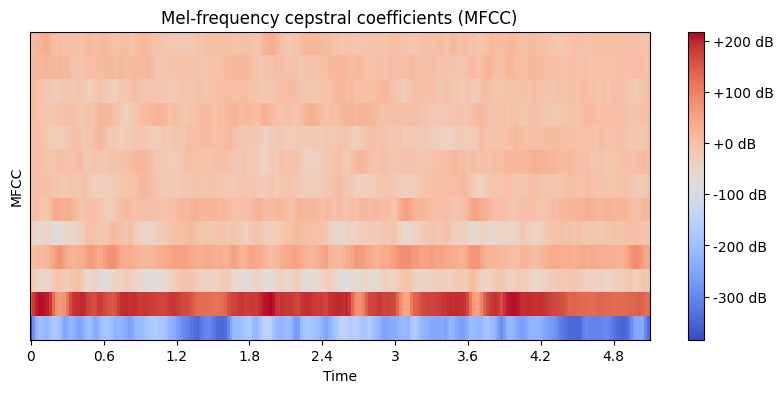

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

def display_mfcc(mfccs, sr=22050):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency cepstral coefficients (MFCC)')
    plt.xlabel('Time')
    plt.ylabel('MFCC')
    plt.show()

# Example usage
mfccs = generate_mfcc(audio_path)
display_mfcc(mfccs)


In [10]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import cv2
import librosa
import warnings
# To ignore only FutureWarnings
warnings.filterwarnings("ignore")
# Function to extract MFCC features from audio
def extract_audio_features(file_path, n_mels=128, hop_length=512, n_fft=2048):
    audio_path = "/content/output_audio.wav"
    extract_audio(file_path, audio_path)
    audio, sr = librosa.load(file_path, sr=None)
    mel_spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    # Convert to log scale (dB)
    log_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    resized_spectrogram = cv2.resize(log_mel_spectrogram, (128, 128))
    return resized_spectrogram
    #mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)
    #return log_mel_spectrogram

# Function to extract video frames
"""def extract_video_frames(video_path, frame_shape=(224, 224)):
    frames = []
    cap = cv2.VideoCapture(video_path)
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, frame_shape)
        frames.append(frame)
    cap.release()
    return np.array(frames)"""

def extract_video_frames(video_path, max_frames=None, frame_shape=(224, 224)):
    frames = []
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, frame_shape)
        frames.append(frame)
        frame_count += 1
        # Check if maximum frame limit reached
        if max_frames is not None and frame_count >= max_frames:
            break
    cap.release()
    return np.array(frames)

# Define the deep learning model
def create_model(input_video_shape, input_audio_shape, num_classes):
    video_input = layers.Input(shape=input_video_shape)  # Include the batch size dimension
    audio_input = layers.Input(shape=input_audio_shape)
    audio_input = layers.Input(shape=input_audio_shape + (1,))  # Include the batch size dimension and add 1 for the spectrogram depth

    video_model = models.Sequential([
        layers.ConvLSTM2D(32, (3, 3), activation='relu', return_sequences=True),
        layers.MaxPooling3D((2, 2, 2)),
        layers.ConvLSTM2D(64, (3, 3), activation='relu', return_sequences=True),
        layers.MaxPooling3D((2, 2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.1)
    ])


    audio_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.1)
    ])

    video_output = video_model(video_input)
    audio_output = audio_model(audio_input)

    concatenated = layers.Concatenate()([video_output, audio_output])
    output = layers.Dense(num_classes, activation='softmax')(concatenated)

    model = models.Model(inputs=[video_input, audio_input], outputs=output)
    return model



# Load dataset
dataset_path = '/content/dataset/FakeAVCeleb_v1.2'
classes = ['FakeVideo-FakeAudio', 'FakeVideo-RealAudio', 'RealVideo-FakeAudio', 'RealVideo-RealAudio']

# Convert class labels to numeric values
label_encoder = LabelEncoder()
label_encoder.fit(classes)

# Define lists to store features and labels
X_video_train = []
X_audio_train = []
y_train = []
X_video_test = []
X_audio_test = []
y_test = []
max_frames = 20
# Iterate over training videos
for video_path, label in zip(train_videos, train_labels):
    class_name = label # Use label directly
    label = label_encoder.transform([class_name])[0]
    # Extract video frames
    frames = extract_video_frames(video_path,max_frames=max_frames)
    # Extract audio features
    audio_path = video_path.replace('.mp4', '.mp4') # Assuming audio files are in .wav format
    audio_features = extract_audio_features(audio_path)
    # Append features and labels to training lists
    X_video_train.append(frames)
    X_audio_train.append(audio_features)
    y_train.append(label)

# Iterate over testing videos
for video_path, label in zip(test_videos, test_labels):
    class_name = label # Use label directly
    label = label_encoder.transform([class_name])[0]
    # Extract video frames
    frames = extract_video_frames(video_path,max_frames=max_frames)
    # Extract audio features
    audio_path = video_path.replace('.mp4', '.mp4') # Assuming audio files are in .wav format
    audio_features = extract_audio_features(audio_path)
    # Append features and labels to testing lists
    X_video_test.append(frames)
    X_audio_test.append(audio_features)
    y_test.append(label)

# Convert lists to numpy arrays
X_video_train = np.array(X_video_train)
X_audio_train = np.array(X_audio_train)
y_train = np.array(y_train)
X_video_test = np.array(X_video_test)
X_audio_test = np.array(X_audio_test)
y_test = np.array(y_test)

# Convert class labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Check the shape of training and testing data
print("X_video_train shape:", X_video_train.shape)
print("X_audio_train shape:", X_audio_train.shape)
print("y_train shape:", y_train.shape)
print("X_video_test shape:", X_video_test.shape)
print("X_audio_test shape:", X_audio_test.shape)
print("y_test shape:", y_test.shape)

# Define model input shapes and number of classes
input_video_shape = X_video_train.shape[1:]
input_audio_shape = X_audio_train.shape[1:]
num_classes = len(classes)

# Create the model
model = create_model(input_video_shape, input_audio_shape, num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit([X_video_train, X_audio_train], y_train, epochs=20, batch_size=4, validation_data=([X_video_test, X_audio_test], y_test))




MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.
MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


MoviePy - Writing audio in /content/output_audio.wav


MoviePy - Done.


X_video_train shape: (299, 20, 224, 224, 3)
X_audio_train shape: (299, 128, 128)
y_train shape: (299, 4)
X_video_test shape: (299, 20, 224, 224, 3)
X_audio_test shape: (299, 128, 128)
y_test shape: (299, 4)
Epoch 1/20
75/75 [==============================] - 127s 2s/step - loss: 1761.9742 - accuracy: 0.4482 - val_loss: 33.7991 - val_accuracy: 0.5017
Epoch 2/20
75/75 [==============================] - 125s 2s/step - loss: 4.1514 - accuracy: 0.5418 - val_loss: 0.8532 - val_accuracy: 0.5652
Epoch 3/20
75/75 [==============================] - 125s 2s/step - loss: 0.8769 - accuracy: 0.5217 - val_loss: 0.8265 - val_accuracy: 0.6689
Epoch 4/20
75/75 [==============================] - 125s 2s/step - loss: 0.6258 - accuracy: 0.7860 - val_loss: 0.8433 - val_accuracy: 0.8161
Epoch 5/20
75/75 [==============================] - 125s 2s/step - loss: 0.5964 - accuracy: 0.8662 - val_loss: 0.5294 - val_accuracy: 0.8328
Epoch 6/20
75/75 [==============================] - 125s 2s/step - loss: 0.4918 - ac

In [ ]:
print(y_train[6])

In [ ]:
print(len(X_audio_train))
X_audio_train[16].shape

In [ ]:
print(len(X_audio_train))
X_audio_train[0].shape